In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats

In [2]:
df = pd.read_csv('propulsion.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [3]:
df.shape

(10000, 18)

In [4]:
# To predict GT Compressor decay state coefficient
df.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [5]:
df.rename(columns = {'Lever position (lp) [ ]':'lp','Ship speed (v) [knots]':'speed',
                              'Gas Turbine shaft torque (GTT) [kN m]':'GTT',
                              'Gas Turbine rate of revolutions (GTn) [rpm]':'GTn',
                              'Gas Generator rate of revolutions (GGn) [rpm]':'GGn',
                              'Starboard Propeller Torque (Ts) [kN]':'Ts',
                              'Port Propeller Torque (Tp) [kN]':'Tp',
                              'HP Turbine exit temperature (T48) [C]':'T48',
                              'GT Compressor inlet air temperature (T1) [C]':'T1',
                              'GT Compressor outlet air temperature (T2) [C]':'T2',
                              'HP Turbine exit pressure (P48) [bar]':'P48',
                              'GT Compressor inlet air pressure (P1) [bar]':'P1',
                              'GT Compressor outlet air pressure (P2) [bar]':'P2',
                              'Gas Turbine exhaust gas pressure (Pexh) [bar]':'Pexh',
                              'Turbine Injecton Control (TIC) [%]':'TIC', 'Fuel flow (mf) [kg/s]':'mf',
                              'GT Compressor decay state coefficient.':'Compressor_decay',
                              'GT Turbine decay state coefficient.':'Turbine_decay'},
                               inplace = True)

In [6]:
df.head()

,lp,speed,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,Compressor_decay,Turbine_decay
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [7]:
df.drop('T1', inplace=True, axis=1)
df.drop('P1', inplace=True, axis=1)

In [8]:
df.shape

(10000, 16)

In [9]:
df.isnull().values.any()

False

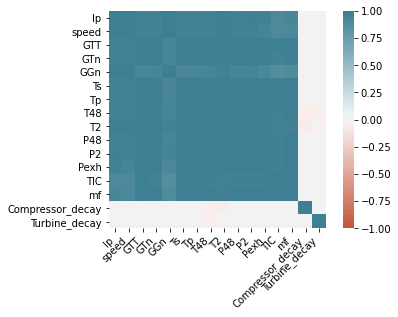

In [10]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [11]:
corr

,lp,speed,GTT,GTn,GGn,Ts,Tp,T48,T2,P48,P2,Pexh,TIC,mf,Compressor_decay,Turbine_decay
lp,1.000000,0.999915,0.960911,0.961725,0.986055,0.959239,0.959239,0.960749,0.982576,0.962875,0.968923,0.953182,0.912612,0.931016,-0.002070,-0.001045
speed,0.999915,1.000000,0.958136,0.960055,0.986651,0.956379,0.956379,0.958342,0.980985,0.960437,0.966792,0.950647,0.908985,0.927413,-0.002009,-0.001008
GTT,0.960911,0.958136,1.000000,0.989663,0.933165,0.999170,0.999170,0.991094,0.990291,0.998888,0.997574,0.996014,0.977424,0.995014,0.000736,-0.000533
GTn,0.961725,0.960055,0.989663,1.000000,0.942944,0.988572,0.988572,0.979419,0.989157,0.995086,0.996008,0.994047,0.961876,0.980114,0.000156,-0.000677
GGn,0.986055,0.986651,0.933165,0.942944,1.000000,0.929888,0.929888,0.939507,0.966665,0.937563,0.946019,0.924375,0.878552,0.896886,-0.020852,0.008703
Ts,0.959239,0.956379,0.999170,0.988572,0.929888,1.000000,1.000000,0.985895,0.987468,0.997996,0.996165,0.996190,0.976964,0.994254,-0.001594,-0.000669
Tp,0.959239,0.956379,0.999170,0.988572,0.929888,1.000000,1.000000,0.985895,0.987468,0.997996,0.996165,0.996190,0.976964,0.994254,-0.001594,-0.000669
T48,0.960749,0.958342,0.991094,0.979419,0.939507,0.985895,0.985895,1.000000,0.992211,0.989299,0.990364,0.979985,0.969290,0.986324,-0.041719,-0.039901
T2,0.982576,0.980985,0.990291,0.989157,0.966665,0.987468,0.987468,0.992211,1.000000,0.991726,0.994381,0.983489,0.958245,0.976426,-0.049096,-0.018060
P48,0.962875,0.960437,0.998888,0.995086,0.937563,0.997996,0.997996,0.989299,0.991726,1.000000,0.999401,0.997941,0.975268,0.992656,0.006266,-0.003528


# Applying Various Regression Algorithms

# Predicting GT Compressor decay state coefficient

In [12]:
X = df[['lp','speed','GTT','GTn','GGn','Ts','Tp','T48','T2','P48','P2','Pexh','TIC','mf','Turbine_decay']] 
y = df['Compressor_decay']

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
import lightgbm as lgb
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random

# Random Forest Regression

In [14]:
# Performing RandomsearchCV on Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [10,20]}  
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 2, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

# Predicting train and test results (Random forest)
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

print("\nTest Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  0.0004049911815618404
R-Squared:  0.9992473073498938

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  0.0010233527414011943
R-Squared:  0.9951313898187547


# XGBoost

In [15]:
#pip install xgboost

In [16]:
from numpy import loadtxt
from xgboost import XGBRegressor 

In [17]:
xgb_reg =  XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

print("Train Results for XGBoost Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

print("\nTest Results for XGBoost Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Train Results for XGBoost Model:
Root Mean Squared Error:  0.000765249933212745
R-Squared:  0.9973125948669245

Test Results for XGBoost Model:
Root Mean Squared Error:  0.0013617635056948167
R-Squared:  0.9913789994906157


# Predicting GT Turbine decay state coefficient

In [18]:
X = df[['lp','speed','GTT','GTn','GGn','Ts','Tp','T48','T2','P48','P2','Pexh','TIC','mf','Compressor_decay']] 
y = df['Turbine_decay']

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# LightGBM

In [19]:
#pip install lightgbm

In [20]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 6,
    'num_leaves':10,
    'learning_rate': 0.1,
    'force_col_wise':'true',
    'verbose': 0}
n_estimators = 100

In [21]:
gbm = lgb.LGBMRegressor(**params)
gbm.fit(X_train, y_train)

y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

print("Train Results for LGBMRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

print("\nTest Results for LGBMRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))


Train Results for LGBMRegressor Model:
Root Mean Squared Error:  0.001731345268583719
R-Squared:  0.9470988146433902

Test Results for LGBMRegressor Model:
Root Mean Squared Error:  0.001862868688333301
R-Squared:  0.9377461980005647


# Ridge Regression

In [22]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 7, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [23]:
# Predicting train and test results (Ridge regression)
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

print("\nTest Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  0.0018028563501141547
R-Squared:  0.9426385286939023

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  0.0017344104016147927
R-Squared:  0.9460358758354984
